In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [3]:

import seaborn as sns

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [5]:
df = pd.read_csv("~/Downloads/2021-2022 NBA Player Stats - Regular.csv",sep=";", encoding="Windows-1252")
df.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,...,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,...,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8
7,6,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,...,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5
8,7,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,...,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1
9,8,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,...,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [7]:
df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.704433,16.672414,18.265394,2.869951,6.386576,0.426235,0.871305,2.560591,...,0.658267,0.812931,2.519828,3.331650,1.808251,0.582759,0.353571,0.978695,1.564655,7.812438
std,172.637333,4.059640,25.899099,23.817195,9.648292,2.223988,4.651121,0.148525,0.841935,2.205642,...,0.283491,0.744196,1.790656,2.352818,1.838080,0.425452,0.360811,0.817941,0.826783,6.138077
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


/home/miki/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


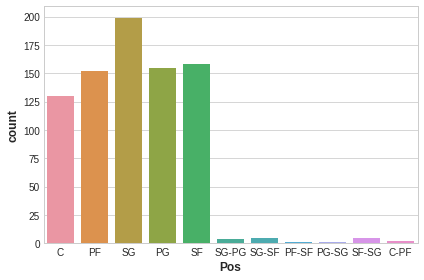

In [9]:
sns.countplot(df['Pos'],label="Count")
plt.show()

In [8]:
df['Pos']

0       C
1       C
2       C
3      PF
4       C
       ..
807    PF
808    PG
809     C
810     C
811     C
Name: Pos, Length: 812, dtype: object

In [10]:
X = df.drop('Pos', axis=1)
y = df['Pos']

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [11]:
discrete_features = X.dtypes == int

In [12]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [13]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

Rk        1.633307
Player    1.633307
G         0.296647
GS        0.280218
ORB       0.225165
FG%       0.162823
3PA       0.146108
TRB       0.143973
eFG%      0.138951
Age       0.134779
2P%       0.132842
BLK       0.124814
3P        0.105488
Tm        0.093172
FT%       0.071615
AST       0.050948
DRB       0.048764
PF        0.041767
2P        0.037917
STL       0.031194
2PA       0.030092
FGA       0.029975
FTA       0.023477
FT        0.017848
3P%       0.016343
FG        0.015959
TOV       0.002715
MP        0.000000
PTS       0.000000
Name: MI Scores, dtype: float64

In [14]:
def drop_uninformative(df, mi_scores):
    return df.loc[:, mi_scores > 0.05]

X = drop_uninformative(X, mi_scores)

In [15]:
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

In [16]:
X

,Rk,Player,Age,Tm,G,GS,FG%,3P,3PA,2P%,eFG%,FT%,ORB,TRB,AST,BLK,Cluster
0,1,0,22,0,73,28,0.439,0.8,2.1,0.468,0.486,0.595,2.0,6.5,1.1,0.6,3
1,2,1,28,1,76,75,0.547,0.0,0.0,0.548,0.547,0.543,4.6,10.0,3.4,0.8,3
2,3,2,24,2,56,56,0.557,0.0,0.1,0.562,0.557,0.753,2.4,10.1,3.4,0.8,3
3,4,3,21,1,32,0,0.402,0.2,1.5,0.560,0.424,0.625,1.0,2.7,0.7,0.3,3
4,5,4,36,3,47,12,0.550,0.3,1.0,0.578,0.566,0.873,1.6,5.5,0.9,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,600,33,0,26,0,0.465,0.7,1.7,0.495,0.524,0.481,1.5,4.4,1.7,0.4,1
808,602,601,23,20,76,76,0.460,3.1,8.0,0.512,0.536,0.904,0.7,3.7,9.7,0.1,1
809,603,602,23,2,56,12,0.526,0.0,0.2,0.547,0.528,0.623,1.5,5.3,0.9,0.4,1
810,604,603,29,29,27,0,0.567,0.0,0.1,0.593,0.567,0.776,1.9,4.6,0.8,0.2,1


In [17]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))


Classification Report: 
               precision    recall  f1-score   support

           C       0.52      0.47      0.49       130
        C-PF       0.00      0.00      0.00         2
          PF       0.31      0.28      0.29       152
       PF-SF       0.00      0.00      0.00         1
          PG       0.54      0.48      0.51       155
       PG-SG       0.00      0.00      0.00         1
          SF       0.33      0.40      0.36       158
       SF-SG       0.00      0.00      0.00         5
          SG       0.41      0.40      0.41       199
       SG-PG       0.00      0.00      0.00         4
       SG-SF       0.00      0.00      0.00         5

    accuracy                           0.39       812
   macro avg       0.19      0.18      0.19       812
weighted avg       0.41      0.39      0.40       812



/home/miki/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict = cross_val_predict(estimator = random_forest, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

/home/miki/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Classification Report: 
               precision    recall  f1-score   support

           C       0.63      0.64      0.63       130
        C-PF       0.00      0.00      0.00         2
          PF       0.38      0.36      0.37       152
       PF-SF       0.00      0.00      0.00         1
          PG       0.61      0.61      0.61       155
       PG-SG       0.00      0.00      0.00         1
          SF       0.31      0.32      0.31       158
       SF-SG       0.00      0.00      0.00         5
          SG       0.44      0.48      0.46       199
       SG-PG       0.00      0.00      0.00         4
       SG-SF       0.00      0.00      0.00         5

    accuracy                           0.47       812
   macro avg       0.22      0.22      0.22       812
weighted avg       0.46      0.47      0.46       812



/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.01      0.02      0.02       130
        C-PF       0.00      0.00      0.00         2
          PF       0.12      0.10      0.11       152
       PF-SF       0.00      0.00      0.00         1
          PG       0.12      0.10      0.11       155
       PG-SG       0.00      0.00      0.00         1
          SF       0.17      0.21      0.19       158
       SF-SG       0.00      0.00      0.00         5
          SG       0.05      0.03      0.04       199
       SG-PG       0.00      0.00      0.00         4
       SG-SF       0.00      0.00      0.00         5

    accuracy                           0.09       812
   macro avg       0.04      0.04      0.04       812
weighted avg       0.09      0.09      0.09       812



/home/miki/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are

In [20]:
from sklearn.svm import SVC

scv = SVC(gamma='auto')
scv.fit(X,y)
predict = cross_val_predict(estimator = scv, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

/home/miki/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Classification Report: 
               precision    recall  f1-score   support

           C       0.00      0.00      0.00       130
        C-PF       0.00      0.00      0.00         2
          PF       1.00      0.01      0.03       152
       PF-SF       0.00      0.00      0.00         1
          PG       0.00      0.00      0.00       155
       PG-SG       0.00      0.00      0.00         1
          SF       0.00      0.00      0.00       158
       SF-SG       0.00      0.00      0.00         5
          SG       0.25      0.99      0.39       199
       SG-PG       0.00      0.00      0.00         4
       SG-SF       0.00      0.00      0.00         5

    accuracy                           0.25       812
   macro avg       0.11      0.09      0.04       812
weighted avg       0.25      0.25      0.10       812



/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/miki/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
